In [2]:
import sys
import os
from pathlib import Path
# Get the current working directory (where the notebook/script is running)
current_dir = Path(os.getcwd())
# Navigate to the 'main' folder (adjust if needed)
main_dir = str(current_dir.parent)  # If notebook is inside 'main'
# OR if notebook is outside 'main':
# main_dir = str(current_dir / "main")  # Assumes 'main' is a subfolder
sys.path.append(main_dir)
# Data Manipulation and Analysis
import numpy as np
from numpy import nan as npNaN
import pandas as pd
import pandas_ta as ta
# Data Visualization
import matplotlib.pyplot as plt
import mplfinance as mpf

# Financial Data Fetching
import yfinance as yf

# Machine Learning and Clustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# import the split lib to split the data into train and test
from sklearn.model_selection import train_test_split
from pyclustering.cluster.silhouette import silhouette_ksearch_type, silhouette_ksearch
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Pattern Mining and Similarity Measures
from Pattern.perceptually_important import find_pips
from Pattern.pip_pattern_miner import Pattern_Miner
from scipy.spatial.distance import euclidean, cityblock, cosine
from scipy.stats import pearsonr
from dtaidistance import dtw

# Get stock Data and train

In [4]:
data = pd.read_csv('C:/Users/yoonus/Documents/GitHub/Stock_AI_Predictor/Data/Stocks/BTCUSD60.csv')
data['Date'] = data['Date'].astype('datetime64[s]')
data = data.set_index('Date')
# trim the data to only include the first 50 data points
data = data.head(500)

#data = data[data.index < '01-01-2020']
arr = data['Close'].to_numpy()

pip_miner = Pattern_Miner(n_pips=5, lookback=24, hold_period=6)
pip_miner.train(arr)
clusters_patterns = pip_miner._pip_clusters
clusters_patterns

[[40, 123, 176, 234, 237, 246],
 [0, 1, 2, 33, 144, 189],
 [7, 37, 84, 97],
 [57, 58, 60, 155, 169],
 [91, 92, 102, 165, 167],
 [50, 132, 134, 154, 168, 238, 239],
 [10, 11, 12, 13, 14, 55, 87, 88, 99, 101, 162, 163, 164, 185],
 [150, 161, 194, 202],
 [59, 61, 64, 129, 130, 135, 136, 137, 171, 240, 242, 243],
 [90, 138, 140, 215],
 [29, 32, 34, 35, 146, 203],
 [17, 49, 54, 72, 141, 153, 166, 197, 225, 227],
 [82, 183],
 [3, 30, 31, 95, 105, 107, 108, 148, 188, 206, 207, 208, 229],
 [38, 51, 115, 116],
 [94, 145, 149, 190, 199, 200],
 [22, 52, 78],
 [56, 79, 80, 81, 131, 173, 175, 177, 178, 179, 214],
 [73, 75, 157, 191],
 [109, 110, 112, 209],
 [62, 170, 220],
 [139, 223, 224],
 [213, 232, 233],
 [21, 23, 76, 77, 184, 221],
 [4, 5, 6, 28, 36, 143],
 [39, 120, 121, 122, 127, 128, 133, 245],
 [211, 230],
 [117, 118, 119, 172, 174, 222, 241, 244],
 [8, 9, 147, 201, 204],
 [25, 41, 42, 45, 47, 53, 65, 69, 124, 236],
 [43, 44, 48, 67, 68, 125, 126, 180, 235, 247],
 [181, 182],
 [103, 104, 2

# Current Sequence

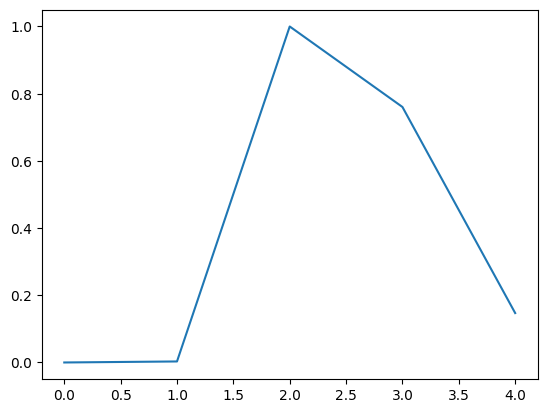

In [20]:
current_data = data.loc['2018-01-01':'2018-01-4']
# get the candles from 0 to 5
current_data = current_data['Close'].iloc[30:35]

# inictialize the scaler
scaler = MinMaxScaler()

# Example current input sequence (reshape it to match the input shape)
current_sequence = current_data.to_numpy()
# scale the current sequence
current_sequence = scaler.fit_transform(current_sequence.reshape(-1, 1)).flatten()

# plot the current sequence
plt.plot(current_sequence)

# ANN


x shape: (248, 5, 1)
y shape: (248,)
Epoch 1/200


c:\Users\yoonus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0199 - loss: 3.7886 - val_accuracy: 0.0200 - val_loss: 3.7842
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0778 - loss: 3.7289 - val_accuracy: 0.0200 - val_loss: 3.7801
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0911 - loss: 3.6741 - val_accuracy: 0.0200 - val_loss: 3.7749
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1146 - loss: 3.5970 - val_accuracy: 0.0200 - val_loss: 3.7654
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1113 - loss: 3.5256 - val_accuracy: 0.0200 - val_loss: 3.7525
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1098 - loss: 3.4347 - val_accuracy: 0.0200 - val_loss: 3.7360
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1365 - loss: 3.2983 - val_accuracy: 0.0600 - val_loss: 3.7145
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1668 - loss: 3.2269 - val_accuracy: 0.0600 - val_loss: 3.

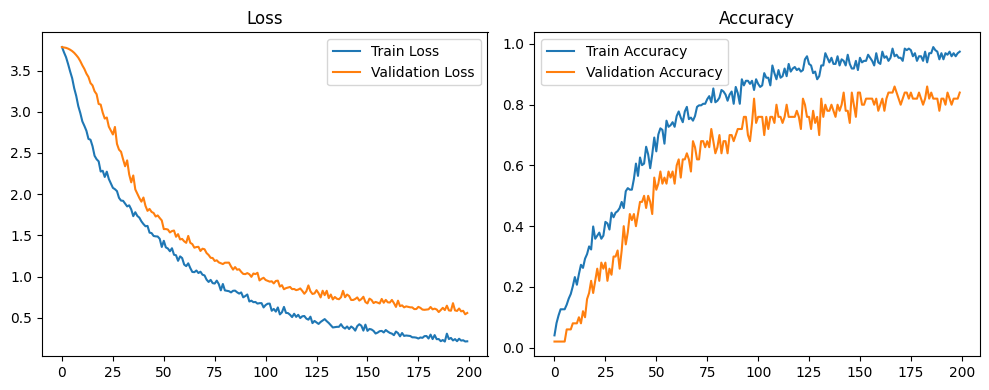

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


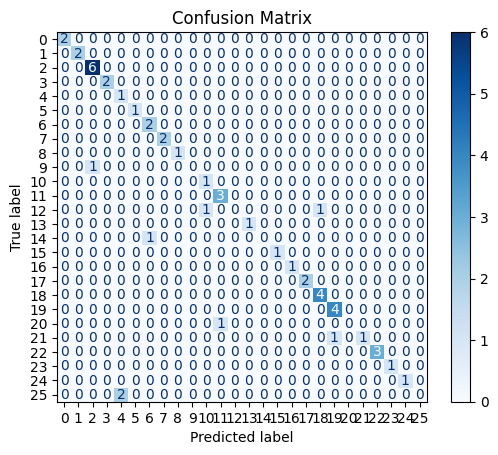

In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def build_classification_model(input_shape, n_classes):
    model = Sequential([
        LSTM(64, activation='tanh', return_sequences=True, input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(32, activation='tanh', return_sequences=False),
        Dense(n_classes, activation='softmax', name='classification'), 
    ])
    model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(clusters):
    # clusters = list of lists of sequences
    # Example: clusters[0] = [sequence1, sequence2, ...] all representing class 0
    x = []
    y = []
    for label, cluster_sequences in enumerate(clusters_patterns):
        for idx in cluster_sequences:
            # get the pattern from the clusters
            seq = pip_miner._unique_pip_patterns[idx]
            x.append(seq)
            y.append(label)

    x = np.array(x)[..., np.newaxis]
    y = np.array(y)

    print('x shape:', x.shape)
    print('y shape:', y.shape)
    
    # Split the data
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Get input shape and number of classes
    input_shape = (X_train.shape[1], X_train.shape[2])
    n_classes = len(clusters)  # Each cluster gets its own class
    
    # Build model using the helper function
    model = build_classification_model(input_shape, n_classes)

    # Train the model
    history = model.fit(X_train, y_train, 
                       validation_data=(X_val, y_val), 
                       epochs=200, 
                       batch_size=16,
                       verbose=1)

    # Plot training history
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.tight_layout()
    plt.show()
    
    return model ,X_val, y_val

def predict_label(model, sequence):
    # Reshape and add channel dimension
    sequence = np.array(sequence).reshape(1, -1, 1)
    probs = model.predict(sequence)[0]
    label = np.argmax(probs)  # Since we're using numeric labels directly
    return label, probs

if __name__ == "__main__":
    
    # Train the model
    model ,x_val , y_val= train_model(clusters_patterns)

    y_pred = np.argmax(model.predict(x_val), axis=1)
    cm = confusion_matrix(y_val, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()
   

In [45]:
# Example prediction
test_sequence = current_sequence  # Example sequence to predict
lstm_idx, probs = predict_label(model, test_sequence)
print(f"Predicted cluster: {lstm_idx}, Probabilities: {probs}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted cluster: 12, Probabilities: [1.44614149e-02 1.62155135e-03 5.46103343e-02 2.60675955e-03
 8.48646536e-02 1.36117907e-02 1.59361545e-04 1.53187045e-03
 5.51590114e-04 1.21626095e-03 2.55574821e-04 2.04532902e-04
 5.82649469e-01 5.94088808e-03 9.43952799e-03 9.87756066e-03
 8.75497889e-03 1.68377478e-02 3.85305728e-03 4.49640788e-02
 3.85894300e-03 1.08018762e-03 4.46769446e-02 1.41358963e-04
 2.94503057e-04 1.36962777e-03 2.55277124e-03 4.40389849e-03
 1.09997396e-04 1.71105750e-02 1.79617971e-04 2.25450881e-02
 4.34596324e-03 2.76095059e-04 8.05585459e-03 4.75645065e-03
 4.81882569e-04 2.15145107e-03 5.75715303e-03 8.82637163e-04
 1.41622708e-03 1.54982647e-03 2.39805109e-03 1.15920082e-02]


# rearrange current sequence

In [21]:
# create labels array based on the lengh of the clusters
labels = np.arange(0, len(pip_miner._cluster_centers))

# convert to numpy array
current_sequence = current_sequence.reshape(1, -1)
print(current_sequence.shape)


(1, 5)


# SVM

In [7]:
# Train an SVM classifier
svm = SVC(kernel='rbf')  # You can try 'linear', 'poly', or 'rbf' kernels
svm.fit(pip_miner._cluster_centers, labels)

def svm_predict(current_sequence):
    # Predict the pattern of the given sequence
    svm_index = svm.predict(current_sequence)

    return svm_index    
# Predict the pattern of the given sequence
svm_index = svm.predict(current_sequence)

print("Predicted pattern:", svm_index[0]+1)

Predicted pattern: 27


# RandomForest

In [8]:
# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(pip_miner._cluster_centers, labels)

def rf_predict(current_sequence):
    # Predict the pattern of the given sequence
    random_forest_index = rf.predict(current_sequence)

    return random_forest_index

# Predict the pattern of the given sequence
random_forest_index = rf.predict(current_sequence)

print("Predicted pattern:", random_forest_index[0]+1)

Predicted pattern: 3


# Euclidean Distance , Manhattan Distance , Cosine Similarity , Pearson Correlation , DTW Distance , MSE
     

In [9]:

# Reshape the query sequence to be 1-dimensional
query_sequence = current_sequence.reshape(-1)

# Function to compute similarity measures
def compute_similarity(query, sequence):
    # Euclidean Distance
    euclidean_dist = euclidean(query, sequence)
    
    # Manhattan Distance
    manhattan_dist = cityblock(query, sequence)
    
    # Cosine Similarity
    cosine_sim = 1 - cosine(query, sequence)  # scipy's cosine returns 1 - cosine similarity
    
    # Pearson Correlation
    pearson_corr, _ = pearsonr(query, sequence)
    
    # Dynamic Time Warping (DTW)
    dtw_dist = dtw.distance(query, sequence)
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(query, sequence)
    
    return {
        "Euclidean Distance": euclidean_dist,
        "Manhattan Distance": manhattan_dist,
        "Cosine Similarity": cosine_sim,
        "Pearson Correlation": pearson_corr,
        "DTW Distance": dtw_dist,
        "MSE": mse
    }

# Initialize variables to track the best match for each measure
best_matches = {
    "Euclidean Distance": {"index": -1, "value": float('inf')},
    "Manhattan Distance": {"index": -1, "value": float('inf')},
    "Cosine Similarity": {"index": -1, "value": -1},
    "Pearson Correlation": {"index": -1, "value": -1},
    "DTW Distance": {"index": -1, "value": float('inf')},
    "MSE": {"index": -1, "value": float('inf')}  # MSE is a distance measure (lower is better)
}

# Compare the query sequence with each sequence in the collection
for i, sequence in enumerate(pip_miner._cluster_centers):
    similarity_results = compute_similarity(query_sequence, sequence)
    
    # Update best matches for each measure
    for measure, value in similarity_results.items():
        if measure in ["Euclidean Distance", "Manhattan Distance", "DTW Distance", "MSE"]:
            if value < best_matches[measure]["value"]:
                best_matches[measure]["index"] = i
                best_matches[measure]["value"] = value
        else:  # Cosine Similarity and Pearson Correlation
            if value > best_matches[measure]["value"]:
                best_matches[measure]["index"] = i
                best_matches[measure]["value"] = value

# Print the best matches for each measure
print("Best Matches for Each Similarity Measure:")
for measure, match in best_matches.items():
    print(f"{measure}: Sequence {match['index']+1} with value {match['value']:.4f}")
    
# Get the index of the best match for each measure   
euclidean_index = best_matches["Euclidean Distance"]["index"]
manhattan_index = best_matches["Manhattan Distance"]["index"]
cosine_index = best_matches["Cosine Similarity"]["index"]
pearson_index = best_matches["Pearson Correlation"]["index"]
dtw_index = best_matches["DTW Distance"]["index"]
mse_index = best_matches["MSE"]["index"]


Best Matches for Each Similarity Measure:
Euclidean Distance: Sequence 27 with value 0.3344
Manhattan Distance: Sequence 27 with value 0.6300
Cosine Similarity: Sequence 27 with value 0.9665
Pearson Correlation: Sequence 27 with value 0.9400
DTW Distance: Sequence 27 with value 0.3344
MSE: Sequence 27 with value 0.0224


# Ploting


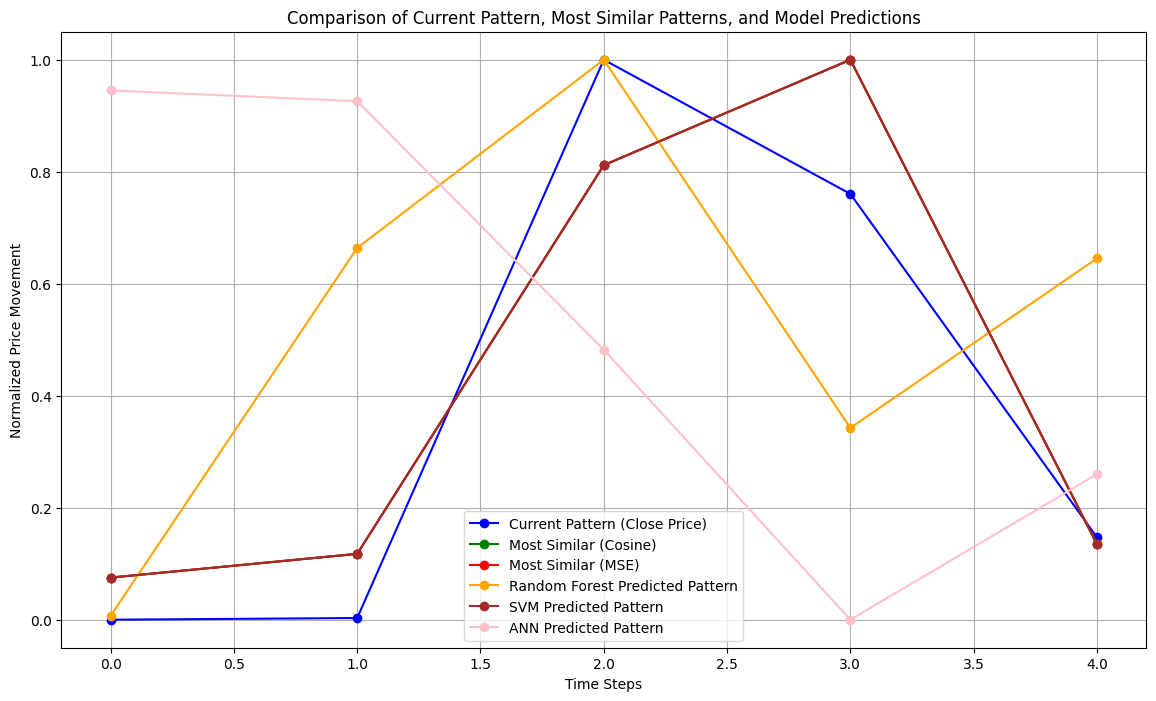

In [10]:
# Step 5: Plot the results
plt.figure(figsize=(14, 8))

# Plot the current pattern (only the 'Close' price for visualization)
plt.plot(current_sequence.flatten(), marker='o', label='Current Pattern (Close Price)', color='blue')

# Plot the most similar pattern using cosine similarity (only the 'Close' price for visualization)
plt.plot(pip_miner._cluster_centers[cosine_index], marker='o', label='Most Similar (Cosine)', color='green')

# Plot the most similar pattern using MSE (only the 'Close' price for visualization)
plt.plot(pip_miner._cluster_centers[mse_index], marker='o', label='Most Similar (MSE)', color='red')

# Plot the Random Forest predicted pattern
plt.plot(pip_miner._cluster_centers[random_forest_index[0]], marker='o', label='Random Forest Predicted Pattern', color='orange')

# Plot the SVM predicted pattern
plt.plot(pip_miner._cluster_centers[svm_index[0]], marker='o', label='SVM Predicted Pattern', color='brown')

# Plot the ANN predicted pattern
plt.plot(pip_miner._cluster_centers[0], marker='o', label='ANN Predicted Pattern', color='pink')

plt.title('Comparison of Current Pattern, Most Similar Patterns, and Model Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Price Movement')
plt.legend()
plt.grid()
plt.show()

In [23]:
# calculate the mean squared error between the current sequence and the predicted svm sequence
# get the cluster in numpy array format
svm_sequence = np.array(pip_miner._cluster_centers[svm_index[0]]).reshape(1, -1)
mse_svm = mean_squared_error(current_sequence,svm_sequence )
print("Mean Squared Error (SVM):", mse_svm)

# find the mean squared error between the current sequence and the predicted random forest sequence
# get the cluster in numpy array format
rf_sequence = np.array(pip_miner._cluster_centers[random_forest_index[0]]).reshape(1, -1)
mse_rf = mean_squared_error(current_sequence,rf_sequence )
print("Mean Squared Error (Random Forest):", mse_rf)

Mean Squared Error (SVM): 0.022367728281848343
Mean Squared Error (Random Forest): 0.17193151954576416
